# Binary Systems in Astrophysics WS 2021/2022

For this tutorial we will learn how access, inspect and extract information from gravitational wave's data. We will use data from the LIGO and VIRGO observatories (Avanced LIGO: https://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001; Advanced VIRGO: https://iopscience.iop.org/article/10.1088/1742-6596/610/1/012014) observatories. In particular, we will use data from the first and second gravitational wave catalogs (GWTC-1, https://journals.aps.org/prx/abstract/10.1103/PhysRevX.9.031040 ; GWTC-2, https://journals.aps.org/prx/abstract/10.1103/PhysRevX.11.021053).

We will employ the tool PyCBC, developed by members of the two collaborations (https://pycbc.org/, https://arxiv.org/abs/1807.10312). This is the first out of two tutorials, based on the online documentation and the github site of the package (http://pycbc.org/pycbc/latest/html/# , https://github.com/gwastro/PyCBC-Tutorials). Such resulting tutorial is certainly an oversimplification! For a more detailed analysis, check the original material.

As always, you can get this jupyter notebook entering your local binary folder linked to GitLab and pulling the new material:

$ git pull

In order to install PyCBC, you can use ...

$ pip install pycbc

## The 2nd poster session

The second session will take place on the 21st of January 2022.

Procedure: 

- A list of Gravitational Waves will be provided on OLAT. Choose one :)
- You should detect the signal, find its SNR and be able to characterise it.
- Estimate the distance to the merger and the masses of the system. 
- Try to simulate a similar system.
- How does it compare with other detections?

Presentation mode:

- You should prepare a poster on your object.
- The formatting (vertical/horizontal, organization, text/images) and what to explain is up to you. Using a template is recommended.
- You have 5/10 minutes for the presentation. Questions will follow, together with feedback.

 ## 8. Data analysis of Gravitational Waves I

There are a few packages that allow us to explore gravitational wave data, but not many are as versatile as PyCBC. This packages will allow us to explore gravitational wave (GW) data and extract physical information. In this first session we will get familiar with the tool and the data itself, while next week we will try to learn how to model the signal.

We can start by checking the different GW catalogs:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pycbc import catalog

catalog.Catalog(source='gwtc-1').names

dict_keys(['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1'])

That allowed us to check all the sources included in the first catalog of GWs (GWTC-1). How many are there in other catalogs?

In [3]:
catalog.Catalog(source='gwtc-2').names

dict_keys(['GW190408_181802-v1', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v3', 'GW190521_074359-v1', 'GW190527_092055-v1', 'GW190602_175927-v1', 'GW190620_030421-v1', 'GW190630_185205-v1', 'GW190701_203306-v1', 'GW190706_222641-v1', 'GW190707_093326-v1', 'GW190708_232457-v1', 'GW190719_215514-v1', 'GW190720_000836-v1', 'GW190727_060333-v1', 'GW190728_064510-v1', 'GW190731_140936-v1', 'GW190803_022701-v1', 'GW190814-v2', 'GW190828_063405-v1', 'GW190828_065509-v1', 'GW190909_114149-v1', 'GW190910_112807-v1', 'GW190915_235702-v1', 'GW190924_021846-v1', 'GW190929_012149-v1', 'GW190930_133541-v1'])

In [4]:
# The third catalog does not seem to be included yet in the automatic installation via pip!
# It has just been uploaded to ArXiv https://arxiv.org/abs/2111.03606 
catalog.Catalog(source='gwtc-3').names

dict_keys(['GW191103_012549-v1', 'GW191105_143521-v1', 'GW191109_010717-v1', 'GW191113_071753-v1', 'GW191126_115259-v1', 'GW191127_050227-v1', 'GW191129_134029-v1', 'GW191204_110529-v1', 'GW191204_171526-v1', 'GW191215_223052-v1', 'GW191216_213338-v1', 'GW191219_163120-v1', 'GW191222_033537-v1', 'GW191230_180458-v1', 'GW200112_155838-v1', 'GW200115_042309-v2', 'GW200128_022011-v1', 'GW200129_065458-v1', 'GW200202_154313-v1', 'GW200208_130117-v1', 'GW200208_222617-v1', 'GW200209_085452-v1', 'GW200210_092254-v1', 'GW200216_220804-v1', 'GW200219_094415-v1', 'GW200220_061928-v1', 'GW200220_124850-v1', 'GW200224_222234-v1', 'GW200225_060421-v1', 'GW200302_015811-v1', 'GW200306_093714-v1', 'GW200308_173609-v1', 'GW200311_115853-v1', 'GW200316_215756-v1', 'GW200322_091133-v1'])

If we want to access a single source, we can access many stored information

In [5]:
m = catalog.Merger('GW150914',source='gwtc-1')

## Print data
print(m.data.keys())

dict_keys(['GPS', 'catalog.shortName', 'chi_eff', 'chi_eff_lower', 'chi_eff_unit', 'chi_eff_upper', 'chirp_mass', 'chirp_mass_lower', 'chirp_mass_source', 'chirp_mass_source_lower', 'chirp_mass_source_unit', 'chirp_mass_source_upper', 'chirp_mass_unit', 'chirp_mass_upper', 'commonName', 'far', 'far_lower', 'far_unit', 'far_upper', 'final_mass_source', 'final_mass_source_lower', 'final_mass_source_unit', 'final_mass_source_upper', 'jsonurl', 'luminosity_distance', 'luminosity_distance_lower', 'luminosity_distance_unit', 'luminosity_distance_upper', 'mass_1_source', 'mass_1_source_lower', 'mass_1_source_unit', 'mass_1_source_upper', 'mass_2_source', 'mass_2_source_lower', 'mass_2_source_unit', 'mass_2_source_upper', 'network_matched_filter_snr', 'network_matched_filter_snr_lower', 'network_matched_filter_snr_unit', 'network_matched_filter_snr_upper', 'redshift', 'redshift_lower', 'redshift_unit', 'redshift_upper', 'reference', 'strain', 'total_mass_source', 'total_mass_source_lower', 'to

The catalog data is generaly stored in the source frame, but due to the cosmological redshift, it has to be corrected. Here we will show how to correct the chirp mass, which is defined as

$$M_{chirp} = \frac{(m_1\cdot m_2)^{3/5}}{(m_1+m_2)^{1/5}}$$

In [6]:
source_mchirp = m.median1d('mchirp')
redshift = m.median1d('redshift')
det_mchirp = source_mchirp * (1 + redshift)

print('Chirp Mass of GW150914')
print('Source Frame: {} Solar Masses'.format(source_mchirp))
print('Detector Frame: {} Solar Masses'.format(det_mchirp))


Chirp Mass of GW150914
Source Frame: 28.6 Solar Masses
Detector Frame: 31.174000000000003 Solar Masses


But how do we access the signal data from the source? 

LIGO is composed by 2 different detectors: LIGO-Livingston and LIGO-Hanford. The detectors themselves are time-domain instruments, recording the amplitude of the signal as a relative change in the lengths of each of the interferometer arms. Thus prividing a timely recording of the strain. 

Such strain can be extracted as a TimeSeries object

Duration: 32.0s Start: 1126259447 End: 1126259479


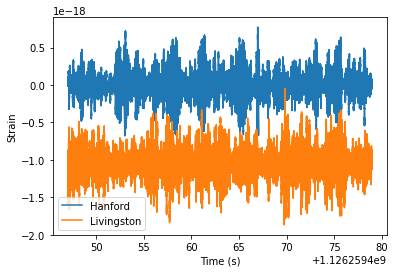

In [7]:
%matplotlib inline
import pylab

# Loading the time-stream strain from Hanford
ts_han = m.strain('H1')

# And also Livingston
ts_liv = m.strain('L1')

# Note: All times are given in seconds since the GPS time epoch
print("Duration: {}s Start: {} End: {}".format(ts_han.duration, 
                                              int(ts_han.start_time),
                                              int(ts_han.end_time)))

# We can directly plot the time series as follows
pylab.plot(ts_han.sample_times, ts_han, label='Hanford')
pylab.plot(ts_liv.sample_times, ts_liv, label='Livingston')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

So there is a lot of noise... How to get rid of it?

First we need to understand how does the distribution of the instrumental noise(s) look like. In order to estimate it, we will use Welch's method to extract a power spectral density (https://en.wikipedia.org/wiki/Welch%27s_method, already implemented in PyCBC).

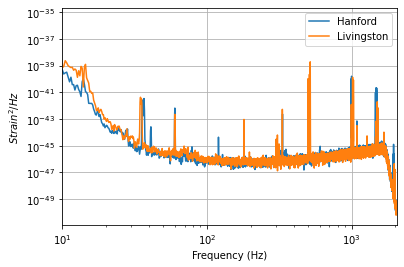

In [8]:
# Welch's method will use time divisions of 4 seconds
psd_han = ts_han.psd(4)
psd_liv = ts_liv.psd(4)

pylab.loglog(psd_han.sample_frequencies, psd_han, label='Hanford')
pylab.loglog(psd_liv.sample_frequencies, psd_liv, label='Livingston')

pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.legend()
pylab.xlim(10, 2048)
pylab.show()

We can clearly see there that the noise is not uniform. Therefore makeing the power spectral density flat (i.e. frequencies contribute equally) will help t distinguish deviations from the noise, like a GW signal. This process is called "whitening", and is applied to the data as

In [9]:
## 1st parameter: Sampling of the PSD estimate
## 2nd parameter: Duration of the filter

whitened_han = ts_han.whiten(4, 4)
whitened_liv = ts_liv.whiten(4, 4)

Also we can focus on the 30 - 250 Hz band which according to simulations will be the main range where our signal will contribute. Note that cutting out the low energy will bring together the range of the two datasets.

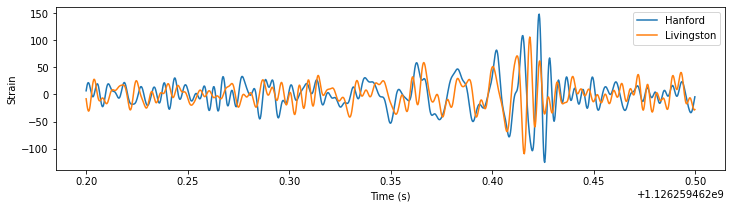

In [11]:
## Filtering low and high frequencies

good_band_han = whitened_han.highpass_fir(30, 4096).lowpass_fir(250, 4096)
good_band_liv = whitened_liv.highpass_fir(30, 4096).lowpass_fir(250, 4096)

## Zoom around the signal
zoom_han = good_band_han.time_slice(m.time - 0.2, m.time + 0.1)
zoom_liv = good_band_liv.time_slice(m.time - 0.2, m.time + 0.1)

pylab.figure(figsize=[12, 3])
pylab.plot(zoom_han.sample_times, zoom_han, label='Hanford')
pylab.plot(zoom_liv.sample_times, zoom_liv, label='Livingston')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

Sadly the signals are not alligned because of 2 effects:

- The two detectors did receive the signal at different times
- They are not aligned in the same direction 

In [12]:
## This is a manual correction!

zoom_liv.roll(int(zoom_liv.sample_rate * .007))
zoom_liv *= -1

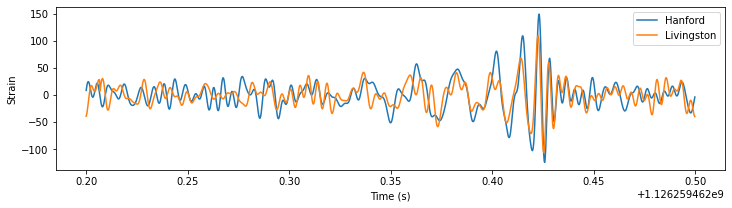

In [13]:
pylab.figure(figsize=[12, 3])
pylab.plot(zoom_han.sample_times, zoom_han, label='Hanford')
pylab.plot(zoom_liv.sample_times, zoom_liv, label='Livingston')
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

Probably you have also seen the time-frequency representation of the signal. This is called the Q-Transform. How to obtain it? 

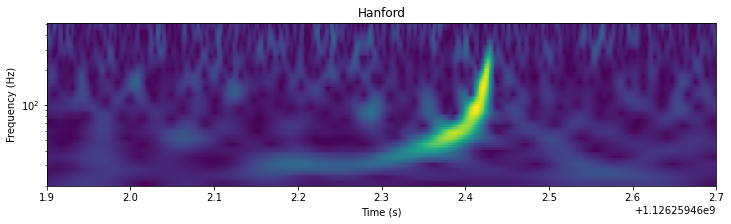

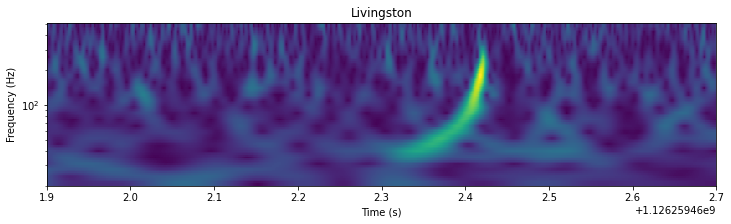

In [14]:
# We use the unfiltered data in frequency
zoom_han_2 = whitened_han.time_slice(m.time - 5, m.time + 5)
zoom_liv_2 = whitened_liv.time_slice(m.time - 5, m.time + 5)

# (1) Time spacing (2) Frequency steps (3) qrange to be maximized (4) frequency range

times_han, freqs_han, power_han = zoom_han_2.qtransform(.001, logfsteps=100, qrange=(8, 8), frange=(20, 512))
times_liv, freqs_liv, power_liv = zoom_liv_2.qtransform(.001, logfsteps=100, qrange=(8, 8), frange=(20, 512))


## Plots

pylab.figure(figsize=[12, 3])
pylab.pcolormesh(times_han, freqs_han, power_han**0.5)
pylab.title('Hanford')
pylab.yscale('log')
pylab.ylabel('Frequency (Hz)')
pylab.xlabel('Time (s)')
pylab.xlim(m.time - 0.5, m.time + 0.3)
pylab.show()

pylab.figure(figsize=[12, 3])
pylab.pcolormesh(times_liv, freqs_liv, power_liv**0.5)
pylab.title('Livingston')
pylab.yscale('log')
pylab.ylabel('Frequency (Hz)')
pylab.xlabel('Time (s)')
pylab.xlim(m.time - 0.5, m.time + 0.3)
pylab.show()


In order to estimate the significance of the signal in one of the detectors, we should assume a certain wave template. Those can be generated directly with PyCBC, and in particular we will use the "SEOBNRv4_opt" template (https://arxiv.org/pdf/1611.03703.pdf). 

But before let's see how different masses and distances will look like into our detector:

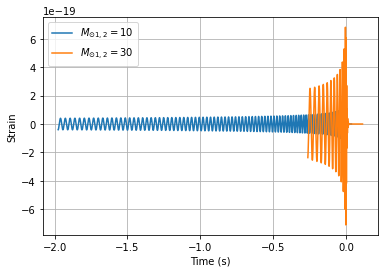

In [15]:
from pycbc.waveform import get_td_waveform

for masses in [10, 30]:
    # We generate data for two different polarizations ("plus" and "cross")
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=masses, # Mass of one black hole
                         mass2=masses, # Mass of the companion
                         delta_t=1.0/4096, # Time sampling
                         f_lower=30) # Minimum frequency
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % masses)
    
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

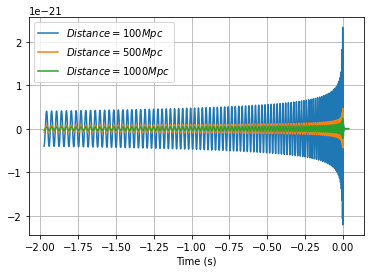

In [16]:
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d) # Distance
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
    
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

Now we want to try to produce a template (not fitting, just generating the model). We will assume two black holes with the same mass for simplification purposes. We will also need the power spectral density!

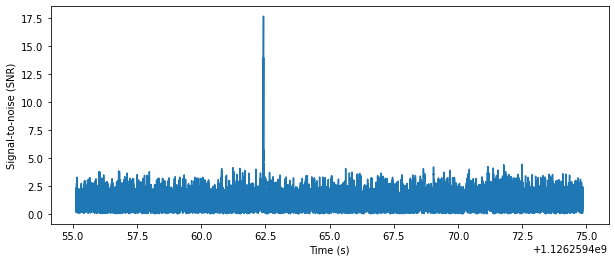

In [17]:
from pycbc.filter import matched_filter
from pycbc.psd import interpolate, inverse_spectrum_truncation

prepared_han = ts_han.highpass_fir(30, 512)

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=36, # Known masses of the system
                         mass2=29,
                         delta_t=1/4096,
                         f_lower=30)

# However, this template is generic. We should use a time length equal to our data
# Make a cyclic time shift, to move the T_0 of the merger
hp.resize(len(prepared_han))
template = hp.cyclic_time_shift(hp.start_time)


# We need to interpolate to match the sampling of our data and model
psd_han = interpolate(psd_han, prepared_han.delta_f)

# We compute our SNR
snr = matched_filter(template, prepared_han,
                     psd=psd_han, low_frequency_cutoff=30)
snr = snr.crop(4 + 4, 4) # Crop 4 seconds on the edges, to reduce "border" noise



pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr)) # The SNR is complex using this method (due to the phase shifts)
pylab.ylabel('Signal-to-noise (SNR)')
pylab.xlabel('Time (s)')
pylab.show()

But is our template really fitting the data? We will use now the SNR result in order to properly align it and visualize the template vs data.

In [18]:
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak] # Time of our peak

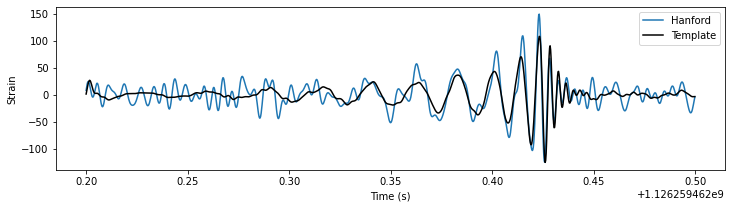

In [19]:
from pycbc.filter import sigma

# Shift the template to the peak time
dt = time - prepared_han.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd_han, low_frequency_cutoff=30.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = prepared_han.start_time

# Filter the template in frequencies and time to match the data + smooth the model
template_filter = aligned.highpass_fir(30, 250, remove_corrupted=False)
template_scaled = (template_filter.to_frequencyseries() / psd_han**0.5).to_timeseries() # Smoothing
template_scaled = template_scaled.highpass_fir(30, 512).lowpass_fir(300, 512) # Filtering

template_zoom = template_scaled.time_slice(m.time-.2, m.time+.1)

## Plot
pylab.figure(figsize=[12, 3])
pylab.plot(zoom_han.sample_times, zoom_han, label="Hanford")
pylab.plot(template_zoom.sample_times, template_zoom, label="Template", color='k')
pylab.legend()
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

### Exercise:

Explore the data from the black hole binary merger GW170814 (https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.119.141101).